In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
import pprint 
import sklearn
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [10]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.csv to cleaned_data.csv


In [55]:
df = pd.read_csv("cleaned_data.csv")
df.head(5)


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Response,Age,IfSingle,EnrollDays,Expenses,NumPurchases,NumAcceptedCmp,AcceptedAnyCmp
0,5524,1,Single,58138.0,0,0,58,635,88,546,...,0,0,1,57,1,971,1617,22,1,Yes
1,2174,1,Single,46344.0,1,1,38,11,1,6,...,0,0,0,60,1,125,27,4,0,No
2,4141,1,Together,71613.0,0,0,26,426,49,127,...,0,0,0,49,0,472,776,20,0,No
3,6182,1,Together,26646.0,1,0,26,11,4,20,...,0,0,0,30,0,65,53,6,0,No
4,5324,4,Married,58293.0,1,0,94,173,43,118,...,0,0,0,33,0,321,422,14,0,No


In [59]:
row, col = df.shape
print(row, col)

2240 32


In [82]:
data = df.iloc[: , :col - 1]
label = df.iloc[: , -8]
del data['Response']
del data['Marital_Status']


In [83]:
xdev, xtest, ydev, ytest = train_test_split(data, label)


In [84]:
# Standardize the datasets
# Encode the target variable.

# Split development set to train and validation sets (8:2).
xtrain, xval, ytrain, yval = train_test_split(xdev, ydev, random_state=20, test_size=0.2)

In [85]:
xtrain.shape

(1344, 29)

In [86]:
ytrain.shape

(1344,)

In [133]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(29,)),
   
    keras.layers.Dense(16, activation=tf.nn.relu),
 
	  keras.layers.Dense(16, activation=tf.nn.relu),
   
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 29)                0         
                                                                 
 dense_56 (Dense)            (None, 16)                480       
                                                                 
 dense_57 (Dense)            (None, 16)                272       
                                                                 
 dense_58 (Dense)            (None, 1)                 17        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [134]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(xdev,ydev, batch_size=1,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
1344/1344 [==============================] - 3s 2ms/step - loss: 111.4839 - accuracy: 0.7374 - val_loss: 68.3547 - val_accuracy: 0.8244
Epoch 2/50
1344/1344 [==============================] - 2s 2ms/step - loss: 80.5246 - accuracy: 0.7723 - val_loss: 16.0142 - val_accuracy: 0.7738
Epoch 3/50
1344/1344 [==============================] - 3s 2ms/step - loss: 69.4300 - accuracy: 0.7879 - val_loss: 125.6422 - val_accuracy: 0.8304
Epoch 4/50
1344/1344 [==============================] - 2s 2ms/step - loss: 66.4932 - accuracy: 0.7686 - val_loss: 16.2684 - val_accuracy: 0.8095
Epoch 5/50
1344/1344 [==============================] - 3s 2ms/step - loss: 45.7446 - accuracy: 0.7932 - val_loss: 23.7714 - val_accuracy: 0.6369
Epoch 6/50
1344/1344 [==============================] - 3s 3ms/step - loss: 35.4514 - accuracy: 0.7879 - val_loss: 32.7136 - val_accuracy: 0.8304
Epoch 7/50
1344/1344 [==============================] - 2s 2ms/step - loss: 38.7605 - accuracy: 0.7783 - val_loss: 62.2023

Text(0.5, 0, 'epochs')

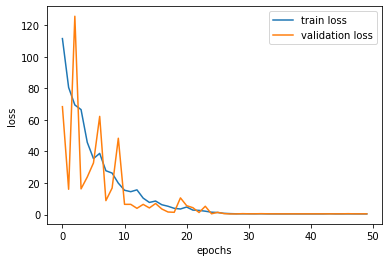

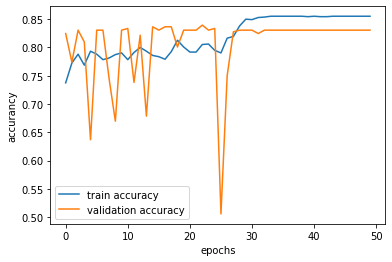

In [135]:
hist = pd.DataFrame(history.history)
fig, ax = plt.subplots(1) 
fig2, ax2 = plt.subplots(1) 

line1, = ax.plot(hist.index,hist['loss'], label='train loss')
line2, = ax.plot(hist.index,hist['val_loss'], label='validation loss')
line3, = ax2.plot(hist.index,hist['accuracy'], label='train accuracy')
line4, = ax2.plot(hist.index,hist['val_accuracy'], label='validation accuracy')

ax.legend(handles=[line1, line2])
ax.set_ylabel("loss")
ax.set_xlabel("epochs")
ax2.legend(handles=[line3, line4])
ax2.set_ylabel("accurancy")
ax2.set_xlabel("epochs")

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 29)                0         
                                                                 
 dense_59 (Dense)            (None, 16)                480       
                                                                 
 dropout_24 (Dropout)        (None, 16)                0         
                                                                 
 dense_60 (Dense)            (None, 16)                272       
                                                                 
 dropout_25 (Dropout)        (None, 16)                0         
                                                                 
 dense_61 (Dense)            (None, 1)                 17        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable

Text(0, 0.5, 'accurancy')

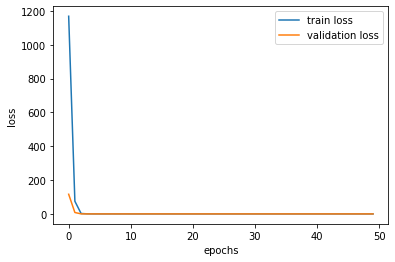

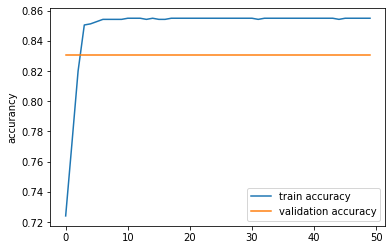

In [136]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(29,)),
  
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
	  keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.summary()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(xdev,ydev, batch_size=1,epochs=50,verbose=1,validation_split=0.2)
hist = pd.DataFrame(history.history)
fig, ax = plt.subplots(1) 
fig2, ax2 = plt.subplots(1) 

line1, = ax.plot(hist.index,hist['loss'], label='train loss')
line2, = ax.plot(hist.index,hist['val_loss'], label='validation loss')
line3, = ax2.plot(hist.index,hist['accuracy'], label='train accuracy')
line4, = ax2.plot(hist.index,hist['val_accuracy'], label='validation accuracy')

ax.legend(handles=[line1, line2])
ax.set_ylabel("loss")
ax.set_xlabel("epochs")
ax2.legend(handles=[line3, line4])
ax2.set_ylabel("accurancy")